In [20]:
#imports
import torch
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [21]:
%run dataloader.ipynb

train size:  7614
dev size:  980
test size:  994


In [22]:
batch_size=1000
train_dataloader = DataLoader(train_set, collate_fn=collate_fn, batch_size=batch_size, shuffle=True)
dev_dataloader = DataLoader(dev_set, collate_fn=collate_fn, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_set, collate_fn=collate_fn, batch_size=batch_size, shuffle=True)

In [23]:
gpu_id = 'cuda:2'
device = torch.device(gpu_id if torch.cuda.is_available() else 'cpu')

In [24]:
humor = 0
no_humor = 0
for batch_idx, batch in enumerate(test_dataloader, 0):
    x_p,x_c,y,hid,x_p_len=map(lambda x: x.to(device), batch)
    for label in y:
        if label == 0:
            no_humor += 1
        if label == 1:
            humor += 1

print(humor)
print(no_humor)

/tmp/ipykernel_295143/249400721.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  context_w=np.array(self.language_sdk[hid]['context_embedding_indexes'])
/tmp/ipykernel_295143/249400721.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  context_of=np.array(self.word_aligned_openface_sdk[hid]['context_features'])
/tmp/ipykernel_295143/249400721.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant 

490
504


In [28]:
# rnn
class RNN(torch.nn.Module):

    def __init__(self, input_dim, hidden_layer_size_1, hidden_layer_size_2) -> None:
        super().__init__()
        self.rnn1_s0 = torch.nn.Parameter(torch.tensor(np.random.normal(0.0, 1.0, (hidden_layer_size_1,)), dtype=torch.float32))
        self.rnn1_c0 = torch.nn.Parameter(torch.tensor(np.random.normal(0.0, 1.0, (hidden_layer_size_1,)), dtype=torch.float32))
        self.rnn2_s0 = torch.nn.Parameter(torch.tensor(np.random.normal(0.0, 1.0, (hidden_layer_size_1,)), dtype=torch.float32))
        self.rnn2_c0 = torch.nn.Parameter(torch.tensor(np.random.normal(0.0, 1.0, (hidden_layer_size_1,)), dtype=torch.float32))
        self.rnn = torch.nn.LSTM(input_dim, hidden_layer_size_1, batch_first=True, num_layers=2)
        self.w1 = torch.nn.Parameter(torch.tensor(np.random.normal(0.0, 1.0, (hidden_layer_size_1, hidden_layer_size_2)), dtype=torch.float32))
        self.b1 = torch.nn.Parameter(torch.zeros((hidden_layer_size_2,), dtype=torch.float32))
        self.w2 = torch.nn.Parameter(torch.tensor(np.random.normal(0.0, 1.0, (hidden_layer_size_2, 1)), dtype=torch.float32))
        self.b2 = torch.nn.Parameter(torch.zeros((1,), dtype=torch.float32))

    def forward(self, x, text_lens):
        batch_size = x.shape[0]
        
        s0 = torch.stack((
            self.rnn1_s0,
            self.rnn2_s0,
        ), dim=0)
        s0 = s0.unsqueeze(1).tile((1, batch_size, 1))

        c0 = torch.stack((
            self.rnn1_c0,
            self.rnn2_c0,
        ), dim=0)
        c0 = c0.unsqueeze(1).tile((1, batch_size, 1))

        (interm_states, (_, _)) = self.rnn(x, (s0, c0))
        final_state = interm_states[torch.arange(batch_size), text_lens - 1, :]
        hidden = torch.nn.functional.leaky_relu(final_state@self.w1 + self.b1)
        return hidden@self.w2 + self.b2

step error


/tmp/ipykernel_295143/249400721.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  context_w=np.array(self.language_sdk[hid]['context_embedding_indexes'])
/tmp/ipykernel_295143/249400721.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  context_of=np.array(self.word_aligned_openface_sdk[hid]['context_features'])
/tmp/ipykernel_295143/249400721.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant 

1 0.7700443267822266
dev accuracy: 50.82%
2 0.7733480334281921
dev accuracy: 55.61%
3 0.695427656173706
dev accuracy: 58.88%
4 0.666189968585968
dev accuracy: 58.88%
5 0.6408803462982178
dev accuracy: 59.39%
6 0.648438036441803
dev accuracy: 60.41%
7 0.6438732743263245
dev accuracy: 59.08%
8 0.5967159271240234
dev accuracy: 59.08%
9 0.6195107102394104
dev accuracy: 59.49%
10 0.6373391151428223
dev accuracy: 58.98%
11 0.6240363121032715
dev accuracy: 61.22%
12 0.6239208579063416
dev accuracy: 60.10%
13 0.573895275592804
dev accuracy: 59.80%
14 0.60170978307724
dev accuracy: 61.12%
15 0.604557454586029
dev accuracy: 60.10%
16 0.5882627964019775
dev accuracy: 59.29%
17 0.5671521425247192
dev accuracy: 59.69%
18 0.5853798389434814
dev accuracy: 57.35%
19 0.5841230154037476
dev accuracy: 58.98%
20 0.5835404992103577
dev accuracy: 59.59%


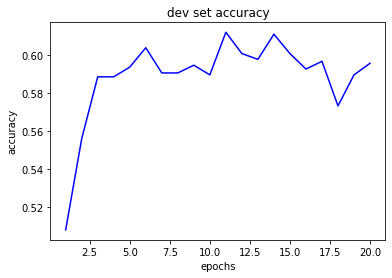

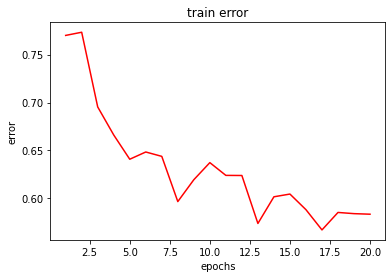

In [29]:
# input features
###
idxs = torch.arange(300) # text, 300
#idxs = torch.arange(300, 381) # speech, 81
#idxs = torch.arange(381, 752) # visual, 371
#idxs = torch.arange(381) # text + speech, 381
#idxs = torch.cat((torch.arange(300), torch.arange(381, 752))) # text + visual, 671
#idxs = torch.arange(300, 752) # speech + visual, 452

device = torch.device(gpu_id if torch.cuda.is_available() else 'cpu')
rnn = RNN(input_dim=300, hidden_layer_size_1=512, hidden_layer_size_2=64)
rnn.to(device)

optimiser = torch.optim.Adam(rnn.parameters(), lr=0.0001)
epochs = 20

print('step', 'error')
dev_accs = []
errors = []
for epoch in range(1, epochs+1):
    for batch_idx, batch in enumerate(train_dataloader, 0):
        x_p,x_c,y,hid,x_p_len=map(lambda x: x.to(device), batch)
        optimiser.zero_grad()
        output = rnn(x_p[:, :, :300], x_p_len)
        error = torch.nn.functional.binary_cross_entropy_with_logits(output, y)
        error.backward()
        optimiser.step()
    
    print(epoch, error.detach().tolist())
    errors.append(error.detach().tolist())

    with torch.no_grad():
        matches = 0
        total = 0
        for batch_idx, batch in enumerate(dev_dataloader, 0): 
            x_p,x_c,y,hid,x_p_len=map(lambda x: x.to(device), batch)
            outputs = torch.sigmoid(rnn(x_p[:, :, :300], x_p_len))
            predictions = (outputs > 0.5)*1
            matches += (y == predictions).sum()
            total += len(y)
        acc = matches / total
        dev_accs.append(float(acc))
        print('dev accuracy: {:.2%}'.format(float(acc)))

plt.plot(range(1, epochs+1), dev_accs, 'b')
plt.title('dev set accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

plt.plot(range(1, epochs+1), errors, 'r')
plt.title('train error')
plt.xlabel('epochs')
plt.ylabel('error')
plt.show()

In [31]:
with torch.no_grad():
    matches = 0
    total = 0
    for batch_idx, batch in enumerate(test_dataloader, 0): 
        x_p,x_c,y,hid, x_p_len=map(lambda x: x.to(device), batch)
        outputs = torch.sigmoid(rnn(x_p[:, :, idxs], x_p_len))
        predictions = (outputs > 0.5)*1
        matches += (y == predictions).sum()
        total += len(y)
    acc = matches / total
    print('test accuracy: {:.2%}'.format(float(acc)))

/tmp/ipykernel_295143/249400721.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  context_w=np.array(self.language_sdk[hid]['context_embedding_indexes'])
/tmp/ipykernel_295143/249400721.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  context_of=np.array(self.word_aligned_openface_sdk[hid]['context_features'])
/tmp/ipykernel_295143/249400721.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant 

test accuracy: 61.37%
